### A series of attempts to answer Google-able questions with the power of python. 
V. I recently downloaded a pedometer app on my phone so I could quantify my laziness: 
https://play.google.com/store/apps/details?id=com.tayu.tau.pedometer&hl=en

The app doesn't export to CSV, so I'll input values by hand to look for various correlations; just by day for now

January 13, 2017 - April 11

Weather: 
http://www.accuweather.com/en/us/new-haven-ct/06510/january-weather/327357

https://www.timeanddate.com/weather/usa/new-haven/historic

In [9]:
#!/usr/bin/env python
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline

In [29]:
step_v = [3001,6172,5040,4995,1936,5624,3298,1820,12587,9873,2655,5768,4543,\
         6651,5051,13876,8186,7403,2526,7668,2357,3646,6401,7183,2829,4363,7893,3350]

mph_v = [2.9,2.9,2.4,2.8,2.7,2.8,2.8,2.8,2.8,2.6,2.9,2.45,2.9,2.8,2.8,2.9,3.0,\
        2.9,3.0,2.9,3.0,2.8,2.9,3.0,2.8,2.6,2.9,2.9]

min_v = [26,55,55,45,18,52,30,16,116,95,23,53,40,60,47,124,71,64,22,66,20,33,\
        57,61,25,43,71,29]

temp_v = [53,29,39,37,41,40,47,42,45,50,44,39,45,48,42,39,41,36,29,42,42,\
          32,33,39,43,37,58,0]

temp_v = [45,28,39,37,39,39,46,43,46,50,41,39,46,48,43,37,43,36,28,43,41,\
          32,34,37,43,37,58,18]

rain_bool_v = [0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1]
d_v = [0,1,2,3,4,5,6]

In [30]:
step_per_day = [0] * 7
time_per_day = [0] * 7

mult = [0] * 7
N = len(step_v) / 7 + 1


for i in xrange(N):
    for j in xrange(7):
        if j+7*i > len(step_v) - 1: 
            break

        mult[j] += 1
        step_per_day[j] += step_v[j+7*i]
        time_per_day[j] += min_v[j+7*i]
        
ave_step_per_day = [step_per_day[k]/mult[k] for k in xrange(7)]
ave_time_per_day = [time_per_day[k]/mult[k] for k in xrange(7)]

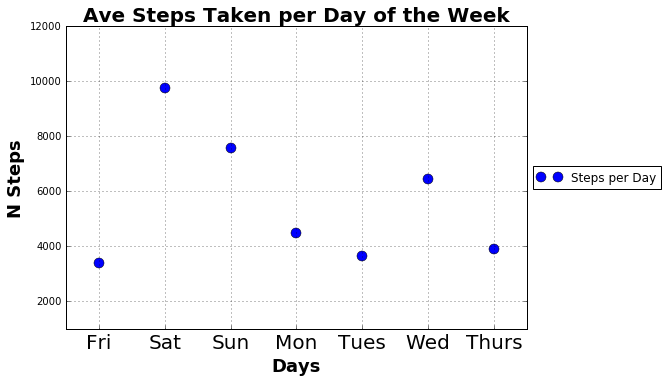

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

#plt.plot(d_v,step_per_day,'ro',label='Steps',ms=10)
plt.plot(d_v,ave_step_per_day,'bo',label='Steps per Day',ms=10)
plt.xlabel('Days',fontsize=18,fontweight='bold')
plt.ylabel('N Steps',fontsize=18,fontweight='bold')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True)
ax.set_xticks(d_v)
ax.set_xlim([-0.5, 6.5])
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['Fri','Sat','Sun','Mon','Tues','Wed','Thurs'],fontsize=20) #'CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])

plt.ylim(1000,12000)

plt.title('Ave Steps Taken per Day of the Week',fontsize=20,fontweight='bold')

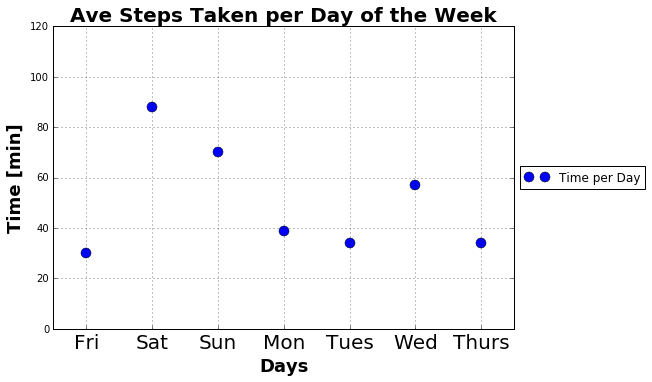

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
plt.plot(d_v,ave_time_per_day,'bo',label='Time per Day',ms=10)
plt.xlabel('Days',fontsize=18,fontweight='bold')
plt.ylabel('Time [min]',fontsize=18,fontweight='bold')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True)
ax.set_xticks(d_v)
ax.set_xlim([-0.5, 6.5])
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['Fri','Sat','Sun','Mon','Tues','Wed','Thurs'],fontsize=20) #'CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])

plt.ylim(0,120)

plt.title('Ave Steps Taken per Day of the Week',fontsize=20,fontweight='bold')

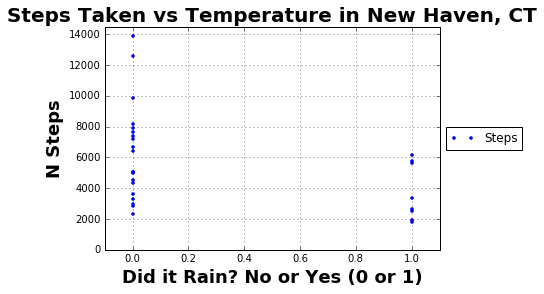

In [33]:
plt.plot(rain_bool_v,step_v,'b.',label='Steps')
plt.xlabel('Did it Rain? No or Yes (0 or 1)',fontsize=18,fontweight='bold')
plt.ylabel('N Steps',fontsize=18,fontweight='bold')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlim(-0.1,1.1)
plt.ylim(0,14500)
plt.title('Steps Taken vs Temperature in New Haven, CT',fontsize=20,fontweight='bold')

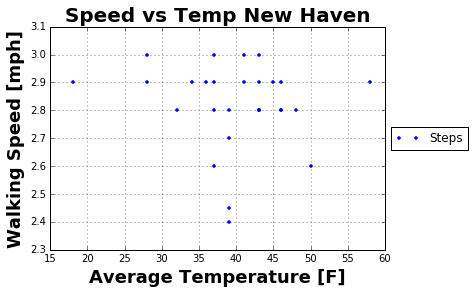

In [34]:
plt.plot(temp_v,mph_v,'b.',label='Steps')
plt.xlabel('Average Temperature [F]',fontsize=18,fontweight='bold')
plt.ylabel('Walking Speed [mph]',fontsize=18,fontweight='bold')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylim(2.3,3.1)
plt.title('Speed vs Temp New Haven',fontsize=20,fontweight='bold',)

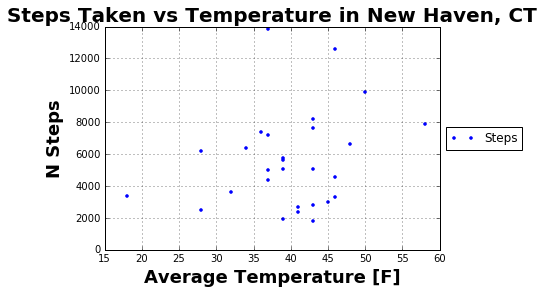

In [35]:
plt.plot(temp_v,step_v,'b.',label='Steps')
plt.xlabel('Average Temperature [F]',fontsize=18,fontweight='bold')
plt.ylabel('N Steps',fontsize=18,fontweight='bold')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Steps Taken vs Temperature in New Haven, CT',fontsize=20,fontweight='bold')

## General conclusions so far:
Only a month of data so far; not really enough to extract trend lines/exclude outlier data. Quick summary:

- I walk the most when it's warm and not rainy
- There are hints of weather affecting my walking speed
- I walk the most on Saturdays, Sundays and Wednesdays. Weekends I spend a lot of time jumping between coffee shops, friends houses and East Rock. Why Wednesdays? The graduate student bar downtown does 241 on Wednesdays; best day of the week.